In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mall_data=pd.read_csv('Mall_Customers (3).csv')
mall_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [28]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
mall_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

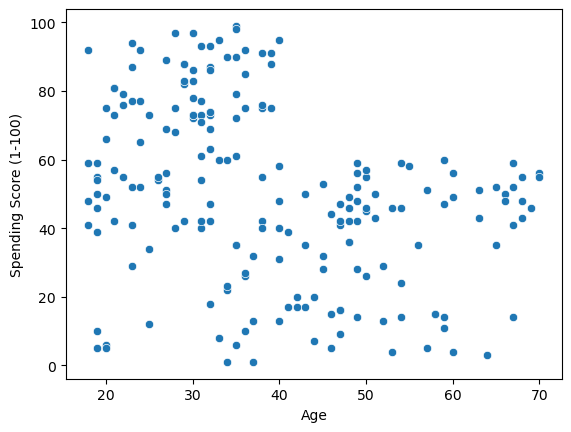

In [9]:
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=mall_data,legend='full')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

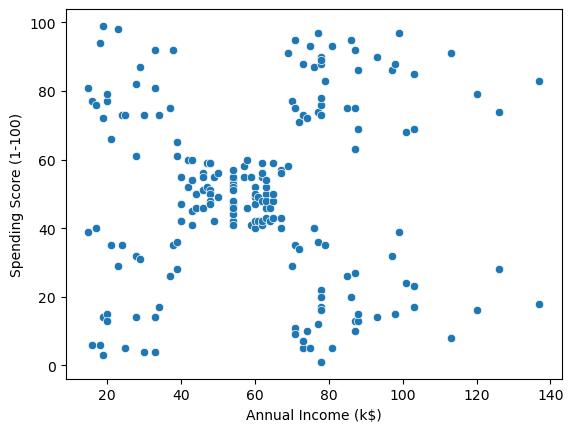

In [6]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=mall_data,legend='full')

In [7]:
from sklearn.cluster import KMeans

In [8]:
x_numerics = mall_data[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [9]:
x_numerics

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [10]:
!pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 1.3 MB/s eta 0:00:00


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

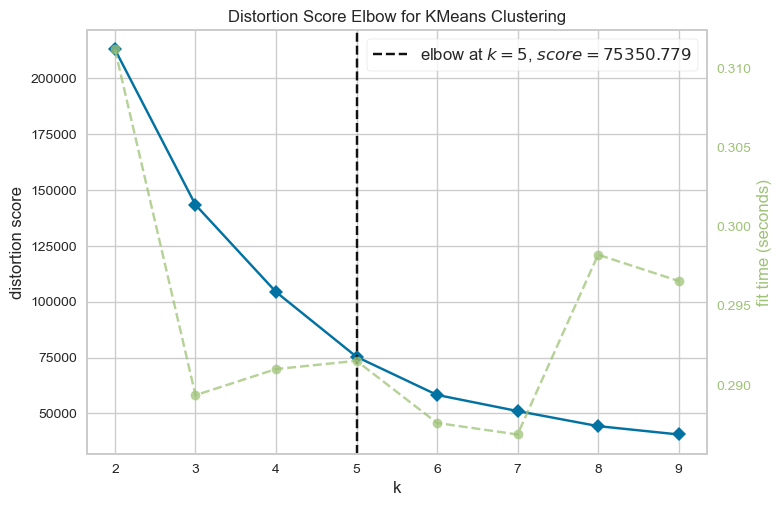

In [11]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(x_numerics)
visualizer.show()
plt.show()

In [20]:
KM_5_clusters = KMeans(n_clusters=5,init='k-means++').fit(x_numerics)
KM_5_clusterd=x_numerics.copy()
KM_5_clusterd.loc[:,'Cluster']=KM_5_clusters.labels_

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
KM_5_clusterd

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,2
197,32,126,74,1
198,32,137,18,2


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

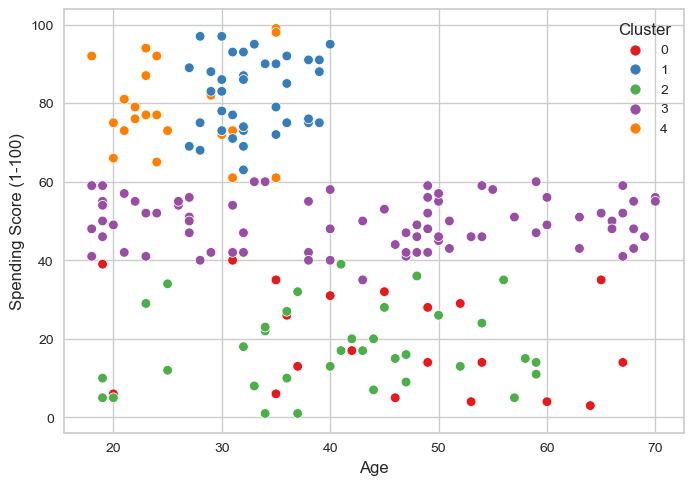

In [22]:
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=KM_5_clusterd,hue='Cluster',palette='Set1',legend='full')

AttributeError: 'DataFrame' object has no attribute 'cluster_centers_'

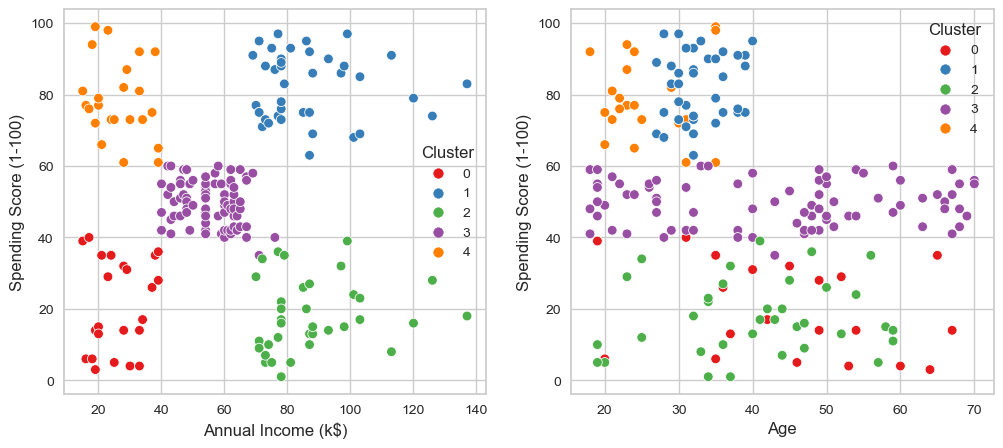

In [27]:
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=KM_5_clusterd,
    hue='Cluster',
    ax=axes[0],
    palette='Set1',
    legend='full'
)

sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    data=KM_5_clusterd,
    hue='Cluster',
    ax=axes[1],
    palette='Set1',
    legend='full'
)

axes[0].scatter(
    KM_5_clusterd.cluster_centers_[:, 0],
    KM_5_clusterd.cluster_centers_[:, 1],
    s=40,
    c='black',
    marker='X'
)

axes[1].scatter(
    KM_5_clusterd.cluster_centers_[:, 2],
    KM_5_clusterd.cluster_centers_[:, 1],
    s=40,
    c='black',
    marker='X'
)


plt.show()
